# Data Analysis and Ratings Prediction for Apps on Google Play Store

**App :** The name of the app

**Category :** The category of the app

**Rating :** The rating of the app in the Play Store

**Reviews :** The number of reviews of the app

**Size :** The size of the app

**Install :** The number of installs of the app

**Type :** The type of the app (Free/Paid)

**Price :** The price of the app (0 if it is Free)

**Content Rating :** The appropiate target audience of the app

**Genres:** The genre of the app

**Last Updated :** The date when the app was last updated

**Current Ver :** The current version of the app

**Android Ver :** The minimum Android version required to run the app

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Loadig the Dataset

In [3]:
df= pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
df.duplicated().sum()

483

In [10]:
df= df.drop(columns=['Current Ver','Android Ver'],axis=1)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


#### **Here we can see that only Rating column is only in float, so we need to convert numerical columns into int and float.**  

### Checking if all values in column 'Reviews' are numeric

In [11]:
df[df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


In [12]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19


### It seems that entries in this row are wrong so we have to delete this row for now.

In [13]:
df= df.drop(df.index[10472],axis=0)
df.shape


(10840, 11)

### Column 'Reviews'

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1016.2+ KB


#### Changing Datatype of column 'Review' ti int

In [15]:
df["Reviews"]= df["Reviews"].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
dtypes: float64(1), int32(1), object(9)
memory usage: 973.9+ KB


### Column 'Size'

In [16]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

##### * Remove all characters from 'size' and convert it to float.


 * It can be seen that data has metric prefixes(kilo and Mega) along with another string.Replacing k and M with their values to convert values to numeric.

* The feature Size must be of floating type.
* The suffix, which is a size unit, must be removed. \ Example: '19.2M' to 19.2

* If size is given as 'Varies with device' we replace it with 0


In [17]:
df['Size']= df['Size'].str.replace('M','000') #<--- Since 1 Megabyte= 1000 Kilobytes
df['Size']= df['Size'].str.replace('k','') #<--- Becoz we want to convert into kilobytes so we are keeping it as it is nd just removing 'k'
df['Size']= df['Size'].replace('Varies with device',np.nan)
df['Size']= df['Size'].astype(float)
df['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+00, 2.50e+04, 2.80e+00, 5.60e+00,
       2.90e+04, 3.30e+04, 3.10e+00, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+00, 5.50e+00, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+00, 7.00e+00, 2.30e+04, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+04, 2.40e+04,      nan,
       9.40e+00, 1.50e+04, 1.00e+04, 1.20e+00, 2.60e+04, 8.00e+00,
       7.90e+00, 5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+04, 2.50e+00,
       1.60e+04, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+04,
       3.20e+04, 5.40e+00, 1.80e+04, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+04, 9.00e+00, 6.70e+00, 3.00e+04, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+04, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+04, 7.30e+04, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+04, 7.30e+00, 9.10e+00, 5.50e

In [18]:
###### Convert mega to kilo then convert all to mega
for i in df['Size']:
    if i < 10:
        df['Size']=df['Size'].replace(i,i*1000)
df['Size']=df['Size']/1000
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
dtypes: float64(2), int32(1), object(8)
memory usage: 973.9+ KB


### Column 'Installs','Price'

* The feature Installs must be of integer type.

* The characters ',' and '+' must be removed. \ Example: '10,000+' to 10000

* The feature Price must be of floating type.

* The suffix '\$' must be removed if Price is non-zero. \ Example: '$4.99' to 4.99

In [20]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [21]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [22]:
remove= ['+',',','$']
cols_to_clean= ['Installs','Price']
for items in remove:
    for cols in cols_to_clean:
        df[cols]= df[cols].str.replace(items,'')

In [23]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [24]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [25]:
# To change Datatype of "Price And Installs" Column
df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')

### Last Updated

* Updating the Last Updated column's datatype from string to pandas datetime.

* Extracting new columns Updated Year, Updated Month and updated day.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
dtypes: float64(3), int32(2), object(6)
memory usage: 931.6+ KB


In [27]:
df['Last Updated']= pd.to_datetime(df['Last Updated'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int32(2), object(5)
memory usage: 931.6+ KB


In [28]:
df['Updated_Month']=df['Last Updated'].dt.month
df['Updated_Year']=df['Last Updated'].dt.year

In [29]:
df.drop(columns='Last Updated',axis=1,inplace=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,6,2018


In [30]:
# Here in column 'updating Month' Months no. as 1st, 2nd,3rd are given so we are consider this column as categorical feature
# so we have to change the datatype of this column.
df['Updated_Month']= df['Updated_Month'].astype('object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Updated_Month   10840 non-null  object 
 11  Updated_Year    10840 non-null  int32  
dtypes: float64(3), int32(3), object(6)
memory usage: 973.9+ KB


### Handle Duplicates and Null Values

In [32]:
df.duplicated().sum()

484

In [33]:
df.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,1,2015


### Handle Null Values

In [34]:
df.shape[0]

10840

In [35]:
df.isna().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Updated_Month        0
Updated_Year         0
dtype: int64

<Axes: >

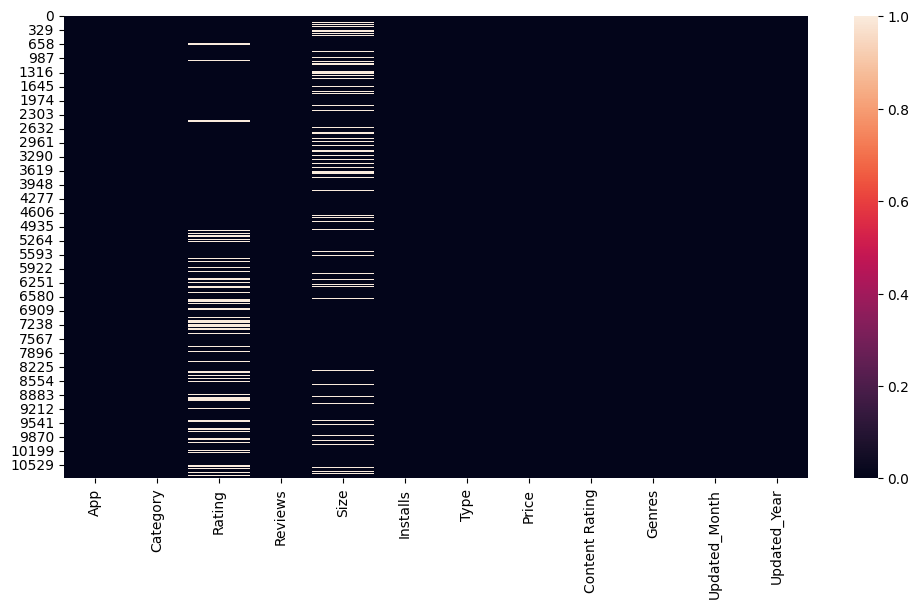

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna())

**Its clear that we have missing values in Rating, Type, Content Rating, Current Ver and Android Ver.**

In [37]:
rating_md= df['Rating'].median()
rating_md

4.3

In [38]:
size_md= df['Size'].median()
size_md

13.0

In [39]:
df['Type'].value_counts()

Type
Free    10039
Paid      800
Name: count, dtype: int64

In [40]:
df['Rating']= df['Rating'].fillna(rating_md)
df['Size']= df['Size'].fillna(size_md)
df['Type']= df['Type'].fillna('Free')

In [41]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int32  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Updated_Month   10840 non-null  object 
 11  Updated_Year    10840 non-null  int32  
dtypes: float64(3), int32(3), object(6)
memory usage: 973.9+ KB


In [43]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Updated_Month     0
Updated_Year      0
dtype: int64

## EDA (Exploatory Data Analysis)

#### Count Acoording to Categories of the app

In [44]:
vc_category= df['Category'].value_counts(ascending=False)
vc_category

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'GAME'),
  Text(2, 0, 'TOOLS'),
  Text(3, 0, 'MEDICAL'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'PRODUCTIVITY'),
  Text(6, 0, 'PERSONALIZATION'),
  Text(7, 0, 'COMMUNICATION'),
  Text(8, 0, 'SPORTS'),
  Text(9, 0, 'LIFESTYLE'),
  Text(10, 0, 'FINANCE'),
  Text(11, 0, 'HEALTH_AND_FITNESS'),
  Text(12, 0, 'PHOTOGRAPHY'),
  Text(13, 0, 'SOCIAL'),
  Text(14, 0, 'NEWS_AND_MAGAZINES'),
  Text(15, 0, 'SHOPPING'),
  Text(16, 0, 'TRAVEL_AND_LOCAL'),
  Text(17, 0, 'DATING'),
  Text(18, 0, 'BOOKS_AND_REFERENCE'),
  Text(19, 0, 'VIDEO_PLAYERS'),
  Text(20, 0, 'EDUCATION'),
  Text(21, 0, 'ENTERTAINMENT'),
  Text(22, 0, 'MAPS_AND_NAVIGATION'),
  Text(23, 0, 'FOOD_AND_DRINK'),
  Text(24, 0, 'HOUSE_AND_HOME'),
  Text(25, 0, 'AUTO_AND_VEHICLES'),
  Text(26, 0, 'LIBRARIES_AND_DEMO'

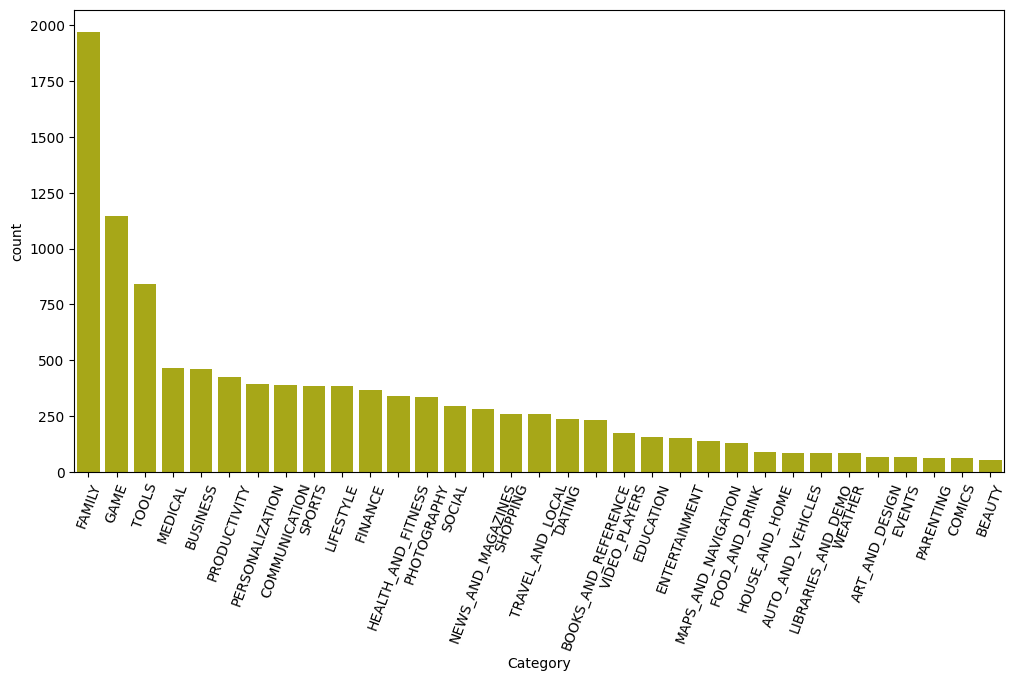

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(data=vc_category,color='y')
plt.xticks(rotation=70)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int32  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Updated_Month   10840 non-null  object 
 11  Updated_Year    10840 non-null  int32  
dtypes: float64(3), int32(3), object(6)
memory usage: 973.9+ KB


#### Count of Types

<Axes: xlabel='Type', ylabel='count'>

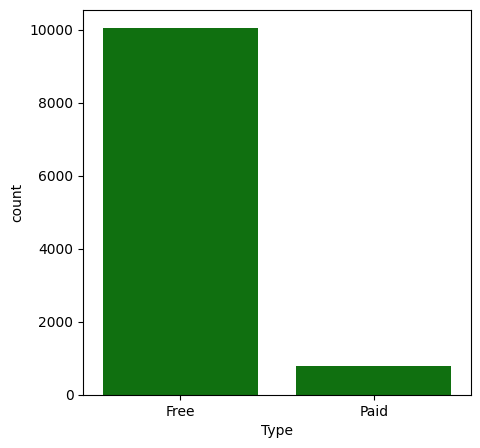

In [47]:
plt.figure(figsize=(5,5))
sns.countplot(data= df, x= 'Type',color='g')

#### Category Vs Rating

In [48]:
cat_rt=df[(df['Rating']>2.5)][['Category','Rating']].sort_values(by='Rating',ascending=False)
cat_rt

,Category,Rating
6726,FAMILY,5.0
7422,PRODUCTIVITY,5.0
9911,FAMILY,5.0
6330,FAMILY,5.0
7805,TOOLS,5.0
...,...,...
8609,NEWS_AND_MAGAZINES,2.6
5580,HEALTH_AND_FITNESS,2.6
2487,MEDICAL,2.6
5173,MEDICAL,2.6


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'PRODUCTIVITY'),
  Text(2, 0, 'TOOLS'),
  Text(3, 0, 'SPORTS'),
  Text(4, 0, 'HEALTH_AND_FITNESS'),
  Text(5, 0, 'PERSONALIZATION'),
  Text(6, 0, 'BUSINESS'),
  Text(7, 0, 'MEDICAL'),
  Text(8, 0, 'GAME'),
  Text(9, 0, 'LIFESTYLE'),
  Text(10, 0, 'LIBRARIES_AND_DEMO'),
  Text(11, 0, 'BOOKS_AND_REFERENCE'),
  Text(12, 0, 'SHOPPING'),
  Text(13, 0, 'SOCIAL'),
  Text(14, 0, 'FINANCE'),
  Text(15, 0, 'DATING'),
  Text(16, 0, 'PHOTOGRAPHY'),
  Text(17, 0, 'COMMUNICATION'),
  Text(18, 0, 'NEWS_AND_MAGAZINES'),
  Text(19, 0, 'TRAVEL_AND_LOCAL'),
  Text(20, 0, 'COMICS'),
  Text(21, 0, 'EVENTS'),
  Text(22, 0, 'PARENTING'),
  Text(23, 0, 'ART_AND_DESIGN'),
  Text(24, 0, 'FOOD_AND_DRINK'),
  Text(25, 0, 'EDUCATION'),
  Text(26, 0, 'VIDEO_PLAYERS'),
  Text(27, 0, 'AUTO_AND_V

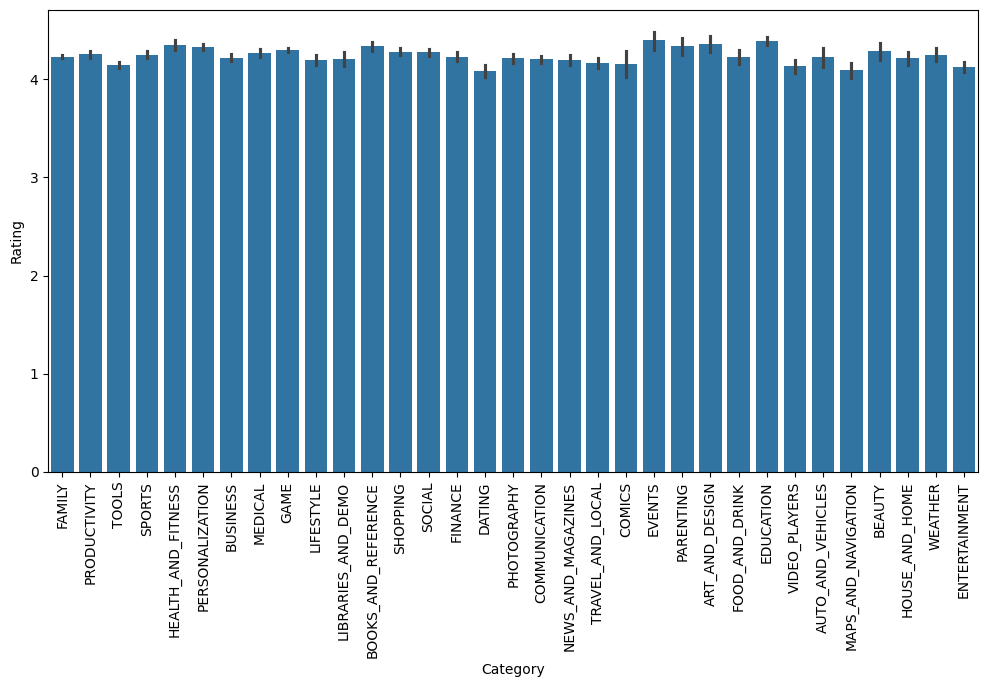

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(data= cat_rt,x= 'Category',y='Rating')
plt.xticks(rotation=90)


In [50]:
#under Paid apps which category downloaded most
df[(df['Type']=='Paid')]['Category'].value_counts()

Category
FAMILY                 191
MEDICAL                109
GAME                    83
PERSONALIZATION         83
TOOLS                   78
PRODUCTIVITY            28
BOOKS_AND_REFERENCE     28
COMMUNICATION           27
SPORTS                  24
PHOTOGRAPHY             22
LIFESTYLE               19
FINANCE                 17
HEALTH_AND_FITNESS      16
BUSINESS                14
TRAVEL_AND_LOCAL        12
WEATHER                  8
DATING                   7
MAPS_AND_NAVIGATION      5
EDUCATION                4
VIDEO_PLAYERS            4
AUTO_AND_VEHICLES        3
SOCIAL                   3
ART_AND_DESIGN           3
FOOD_AND_DRINK           2
ENTERTAINMENT            2
NEWS_AND_MAGAZINES       2
SHOPPING                 2
PARENTING                2
LIBRARIES_AND_DEMO       1
EVENTS                   1
Name: count, dtype: int64

#### Content Rating Vs Installs according to type

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

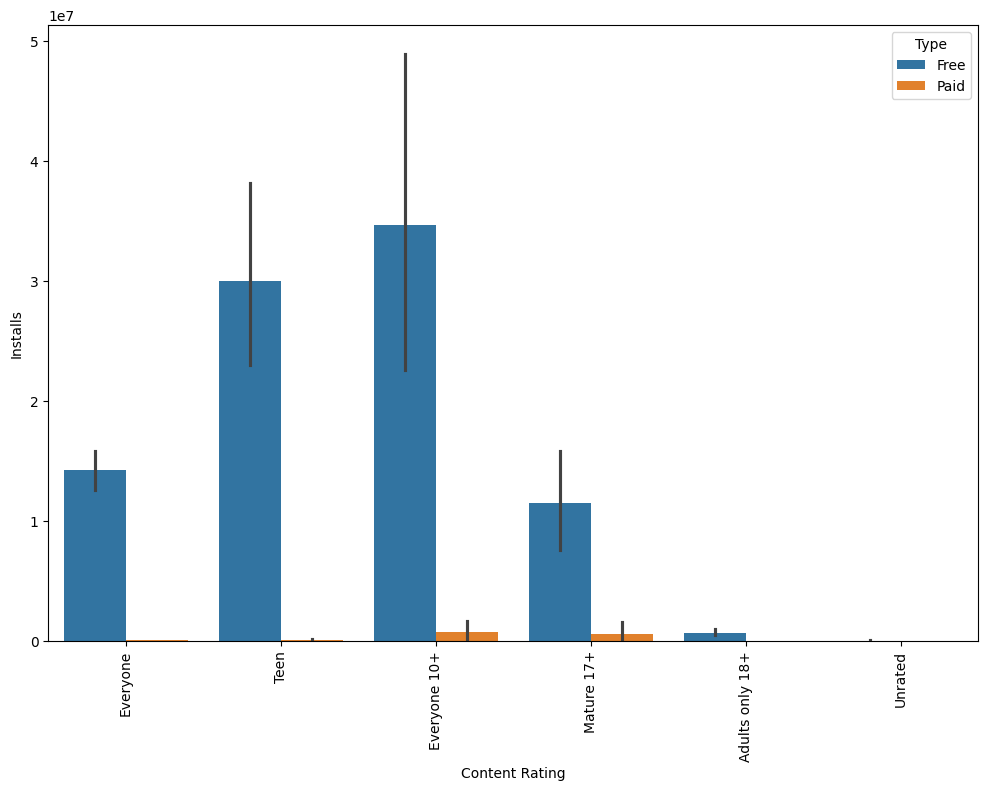

In [51]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=df)
plt.xticks(rotation=90)

#### Category Vs Price

In [52]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,6,2018


In [53]:
# 
df[(df['Price']==0)]['Content Rating'].value_counts()

Content Rating
Everyone           8019
Teen               1156
Mature 17+          479
Everyone 10+        381
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY

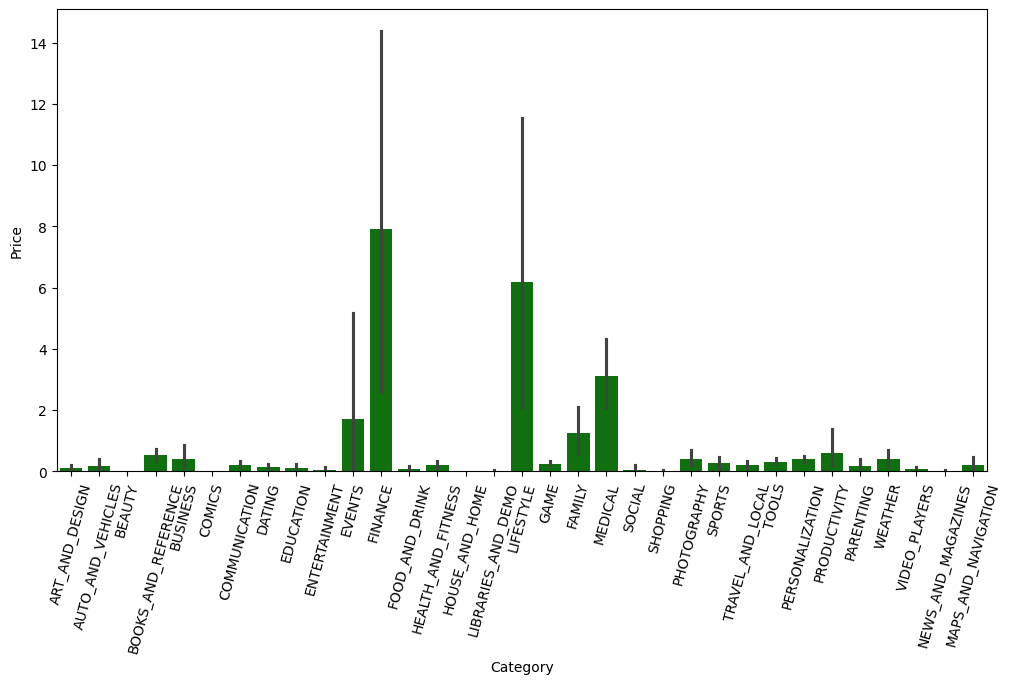

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(data= df,x= 'Category', y='Price',color='g')
plt.xticks(rotation=75)

#### Count of Apps according to Content Rating 

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

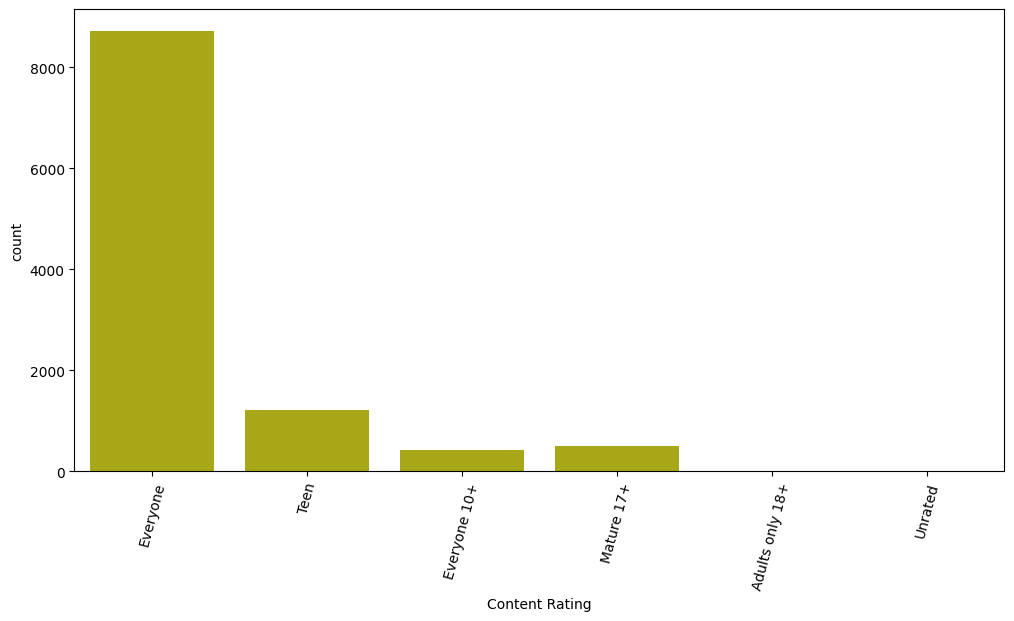

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(data= df,x= 'Content Rating', color='y')
plt.xticks(rotation=75)

#### Content Rating Vs Rating

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

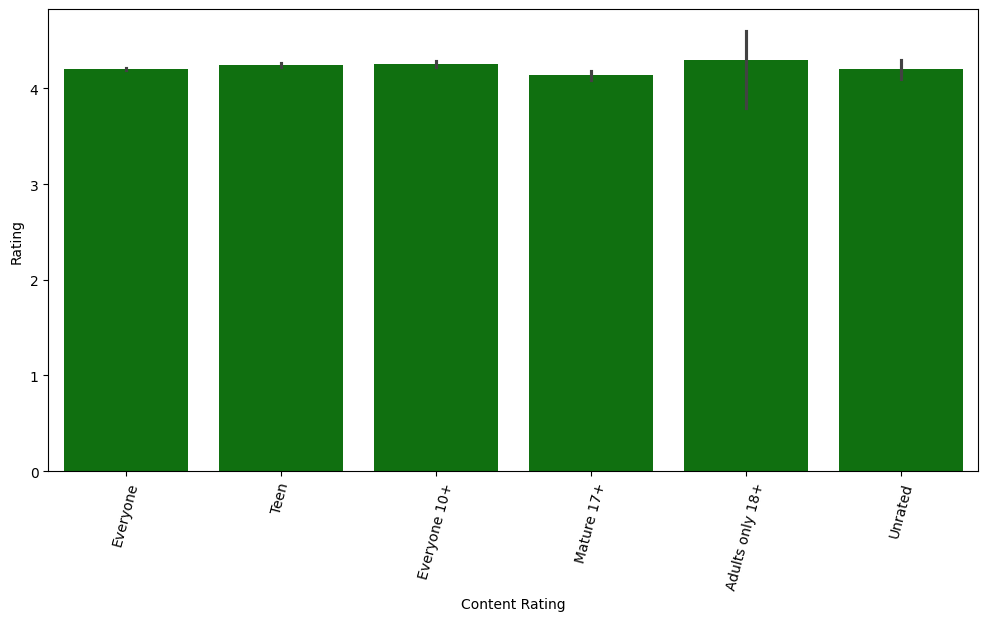

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(data= df,x= 'Content Rating', y='Rating',color='g')
plt.xticks(rotation=75)

## Sepeate X and Y 

In [57]:
x= df.drop(columns=['App','Rating'])
y= df[['Rating']]

In [58]:
x.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Updated_Month,Updated_Year
0,ART_AND_DESIGN,159,19.0,10000,Free,0.0,Everyone,Art & Design,1,2018
1,ART_AND_DESIGN,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,1,2018
2,ART_AND_DESIGN,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,8,2018
3,ART_AND_DESIGN,215644,25.0,50000000,Free,0.0,Teen,Art & Design,6,2018
4,ART_AND_DESIGN,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,6,2018


In [59]:
y.head()

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3


In [136]:
ylist= y['Rating'].tolist()
ylist

[4.1,
 3.9,
 4.7,
 4.5,
 4.3,
 4.4,
 3.8,
 4.1,
 4.4,
 4.7,
 4.4,
 4.4,
 4.2,
 4.6,
 4.4,
 3.2,
 4.7,
 4.5,
 4.3,
 4.6,
 4.0,
 4.1,
 4.7,
 4.3,
 4.7,
 4.8,
 4.7,
 4.1,
 3.9,
 4.1,
 4.2,
 4.1,
 4.5,
 4.2,
 4.7,
 3.8,
 4.7,
 4.1,
 4.7,
 4.0,
 4.2,
 4.5,
 4.4,
 3.8,
 4.2,
 4.7,
 4.6,
 4.2,
 4.3,
 4.2,
 4.0,
 3.8,
 4.6,
 3.9,
 4.3,
 4.9,
 4.4,
 4.2,
 4.0,
 3.9,
 4.6,
 4.9,
 4.3,
 4.6,
 4.9,
 3.9,
 4.0,
 4.3,
 3.9,
 4.2,
 4.8,
 3.6,
 4.2,
 4.8,
 4.8,
 4.6,
 4.5,
 4.3,
 4.5,
 4.9,
 3.9,
 4.4,
 4.0,
 4.3,
 3.7,
 4.4,
 4.3,
 3.2,
 4.6,
 4.6,
 4.5,
 3.7,
 4.6,
 4.6,
 4.6,
 4.0,
 4.4,
 4.0,
 4.7,
 4.9,
 4.7,
 3.9,
 3.9,
 4.2,
 4.6,
 4.3,
 4.7,
 4.7,
 4.8,
 4.2,
 4.3,
 4.5,
 4.1,
 4.3,
 4.2,
 4.5,
 4.4,
 4.0,
 4.1,
 4.1,
 4.4,
 4.6,
 4.5,
 4.3,
 3.9,
 4.4,
 4.3,
 4.6,
 3.8,
 4.3,
 4.3,
 4.0,
 4.3,
 4.5,
 4.3,
 4.1,
 3.7,
 4.7,
 4.2,
 4.6,
 4.5,
 4.6,
 4.4,
 4.2,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.5,
 4.6,
 4.8,
 3.9,
 4.6,
 4.2,
 4.1,
 4.7,
 4.2,
 4.3,
 3.3,
 4.6,
 4.8,
 4.7,
 4.3,
 4.1,
 4.6,
 4.1

In [61]:
y['Rating'].value_counts()

Rating
4.3    2550
4.4    1109
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: count, dtype: int64

In [134]:
# to round of the values
yround=[]
for i in ylist:
    if 1< i < 1.5:
        i=1
        yround.append(i)
    elif 1.5 <= i < 2.5:
        i=2
        yround.append(i)
    elif 2.5<= i < 3.5:
        i=3
        yround.append(i)
    elif 3.5<= i < 4.5:
        i= 4
        yround.append(i)
    else :
        i= 5
        yround.append(i)

In [63]:
yround

[4,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 5,
 4,
 3,
 5,
 5,
 4,
 5,
 4,
 4,
 5,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 5,
 4,
 5,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 5,
 4,
 5,
 5,
 5,
 4,
 4,
 5,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 5,
 4,
 5,
 5,
 5,
 4,
 4,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 3,
 5,
 5,
 5,
 4,
 4,
 5,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 3,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 5,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 5,


In [64]:
Y=pd.DataFrame(yround, columns=['Rating_Round'])
Y

,Rating_Round
0,4
1,4
2,5
3,5
4,4
...,...
10835,5
10836,5
10837,4
10838,5


In [65]:
#y['Rating']=y['Rating'].round(decimals=0)
y['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.3
10839    4.5
10840    4.5
Name: Rating, Length: 10840, dtype: float64

In [66]:
Y.head(10)

,Rating_Round
0,4
1,4
2,5
3,5
4,4
5,4
6,4
7,4
8,4
9,5


In [67]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Rating_Round  10840 non-null  int64
dtypes: int64(1)
memory usage: 84.8 KB


### Categorical and Continueous variables Seperation

In [68]:
cat= x.columns[x.dtypes=='object']
con= x.columns[x.dtypes!='object']

In [69]:
cat

Index(['Category', 'Type', 'Content Rating', 'Genres', 'Updated_Month'], dtype='object')

In [70]:
con

Index(['Reviews', 'Size', 'Installs', 'Price', 'Updated_Year'], dtype='object')

### Pipeline for Preprocessing

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from  sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [72]:
con_pipe= Pipeline(steps=[('Scaler',StandardScaler())])

cat_pipe= Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

pipe= ColumnTransformer([('num',con_pipe,con),
                        ('cat',cat_pipe,cat)])

In [73]:
xpre= pipe.fit_transform(x).toarray()
xpre

array([[-0.15165665, -0.05606762, -0.18176135, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15138066, -0.29436787, -0.17599837, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12181985, -0.54696612, -0.12307304, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.15170994, -0.50883809, -0.1818672 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.15167202, -0.34202792, -0.1818672 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.01565975, -0.05606762, -0.06426711, ...,  0.        ,
         0.        ,  0.        ]])

In [74]:
cols= pipe.get_feature_names_out()
cols

array(['num__Reviews', 'num__Size', 'num__Installs', 'num__Price',
       'num__Updated_Year', 'cat__Category_ART_AND_DESIGN',
       'cat__Category_AUTO_AND_VEHICLES', 'cat__Category_BEAUTY',
       'cat__Category_BOOKS_AND_REFERENCE', 'cat__Category_BUSINESS',
       'cat__Category_COMICS', 'cat__Category_COMMUNICATION',
       'cat__Category_DATING', 'cat__Category_EDUCATION',
       'cat__Category_ENTERTAINMENT', 'cat__Category_EVENTS',
       'cat__Category_FAMILY', 'cat__Category_FINANCE',
       'cat__Category_FOOD_AND_DRINK', 'cat__Category_GAME',
       'cat__Category_HEALTH_AND_FITNESS', 'cat__Category_HOUSE_AND_HOME',
       'cat__Category_LIBRARIES_AND_DEMO', 'cat__Category_LIFESTYLE',
       'cat__Category_MAPS_AND_NAVIGATION', 'cat__Category_MEDICAL',
       'cat__Category_NEWS_AND_MAGAZINES', 'cat__Category_PARENTING',
       'cat__Category_PERSONALIZATION', 'cat__Category_PHOTOGRAPHY',
       'cat__Category_PRODUCTIVITY', 'cat__Category_SHOPPING',
       'cat__Category_

In [75]:
xpre= pd.DataFrame(xpre,columns=cols)
xpre

,num__Reviews,num__Size,num__Installs,num__Price,num__Updated_Year,cat__Category_ART_AND_DESIGN,cat__Category_AUTO_AND_VEHICLES,cat__Category_BEAUTY,cat__Category_BOOKS_AND_REFERENCE,cat__Category_BUSINESS,...,cat__Updated_Month_3,cat__Updated_Month_4,cat__Updated_Month_5,cat__Updated_Month_6,cat__Updated_Month_7,cat__Updated_Month_8,cat__Updated_Month_9,cat__Updated_Month_10,cat__Updated_Month_11,cat__Updated_Month_12
0,-0.151657,-0.056068,-0.181761,-0.064416,0.545278,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.151381,-0.294368,-0.175998,-0.064416,0.545278,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.121820,-0.546966,-0.123073,-0.064416,0.545278,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.078053,0.229893,0.406180,-0.064416,0.545278,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.151381,-0.828160,-0.180703,-0.064416,0.545278,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,-0.151698,1.564374,-0.181820,-0.064416,-0.363100,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10836,-0.151710,-0.790032,-0.181878,-0.064416,0.545278,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10837,-0.151710,-0.508838,-0.181867,-0.064416,-0.363100,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10838,-0.151672,-0.342028,-0.181867,-0.064416,-2.179856,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
xpre.shape

(10840, 177)

### Data Splitting for Training And Testing Modeling (Train test Split)

In [77]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(xpre,Y,test_size=0.2,random_state=85)


In [78]:
xtrain.shape

(8672, 177)

In [79]:
xtest.shape

(2168, 177)

## Evaluate Alhorithms

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [81]:
dict= {'Logisticregression': LogisticRegression(),
       'DecisionTreeClassifier': DecisionTreeClassifier(),
       'RandomForest': RandomForestClassifier(),
       'GradientBoosting': GradientBoostingClassifier(),
       'KNearest': KNeighborsClassifier()}

In [82]:
dict.values()

dict_values([LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier()])

In [83]:
dict.items()

dict_items([('Logisticregression', LogisticRegression()), ('DecisionTreeClassifier', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('GradientBoosting', GradientBoostingClassifier()), ('KNearest', KNeighborsClassifier())])

### Let's frame it as a classification problem statement.



In [84]:
### Converting the Rating from continuous to discrete
#ytrain= ytrain.astype('int')
#ytest= ytest.astype('int')

### For Loop to Evaluate Algorithms

In [85]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
# f1_score is used to know score of categorical variables


In [86]:
tr= [] #  To store training score (f1 score)
tr_cv= [] # To store cross validation score of training data
ts= [] # To store testing score (f1 score)

for name, model in dict.items():

    model.fit(xtrain,ytrain)

    # To predict Test train results

    ypred_tr= model.predict(xtrain)
    ypred_ts= model.predict(xtest)


    # Calculate F1 score in training and testing
    # This is not a binary classification proble so we use average = 'Weighted'.
    f1_tr= f1_score(ytrain,ypred_tr,average ='macro')
    
    f1_ts= f1_score(ytest,ypred_ts,average='macro')

    #if Dataset is to much small so cross validation is not necessory
    # cross_validation score:
    scores= cross_val_score(model,xtrain,ytrain,cv= 5, scoring='f1_macro')
    f1_tr_cv= scores.mean()
    # Here we are not considering CV score to select the model so we are not calculating CV score.
   
    # append all values in list.
    tr.append(f1_tr)
    tr_cv.append(f1_tr_cv)
    ts.append(f1_ts)

    # Print the Results
    print(f'Model_Name: {name}\n')
    print(f'F1 Training Score: {f1_tr}')
    print(f'Training_CV : {f1_tr_cv}')
    print(f'F1 Testing Score: {f1_ts:}')
    print('\n========================================\n')







Model_Name: Logisticregression

F1 Training Score: 0.20413363567646367
Training_CV : 0.23082223637206303
F1 Testing Score: 0.19192744314024632


Model_Name: DecisionTreeClassifier

F1 Training Score: 0.9986657189319894
Training_CV : 0.3331092738031206
F1 Testing Score: 0.3229475268524312


Model_Name: RandomForest

F1 Training Score: 0.9986657299307904
Training_CV : 0.32638143456942226
F1 Testing Score: 0.32631397296387266


Model_Name: GradientBoosting

F1 Training Score: 0.4960758104299443
Training_CV : 0.24009774501083445
F1 Testing Score: 0.24758373471178485


Model_Name: KNearest

F1 Training Score: 0.36133545571821907
Training_CV : 0.2717195524296003
F1 Testing Score: 0.23225000450577643




Dataframe for model Evalution

In [87]:
dct_eval = {'Name':list(dict.keys()),
          'TrainF1':tr,
          'TrainCV': tr_cv,
          'TestF1':ts}

In [88]:
df_eval= pd.DataFrame(dct_eval)
df_eval

,Name,TrainF1,TrainCV,TestF1
0,Logisticregression,0.204134,0.230822,0.191927
1,DecisionTreeClassifier,0.998666,0.333109,0.322948
2,RandomForest,0.998666,0.326381,0.326314
3,GradientBoosting,0.496076,0.240098,0.247584
4,KNearest,0.361335,0.271720,0.232250


In [137]:
df_eval= df_eval.sort_values(by='TrainCV',ascending=False)
df_eval

,Name,TrainF1,TrainCV,TestF1
1,DecisionTreeClassifier,0.998666,0.333109,0.322948
2,RandomForest,0.998666,0.326381,0.326314
4,KNearest,0.361335,0.271720,0.232250
3,GradientBoosting,0.496076,0.240098,0.247584
0,Logisticregression,0.204134,0.230822,0.191927


([0, 1, 2, 3, 4],
 [Text(0, 0, 'DecisionTreeClassifier'),
  Text(1, 0, 'RandomForest'),
  Text(2, 0, 'KNearest'),
  Text(3, 0, 'GradientBoosting'),
  Text(4, 0, 'Logisticregression')])

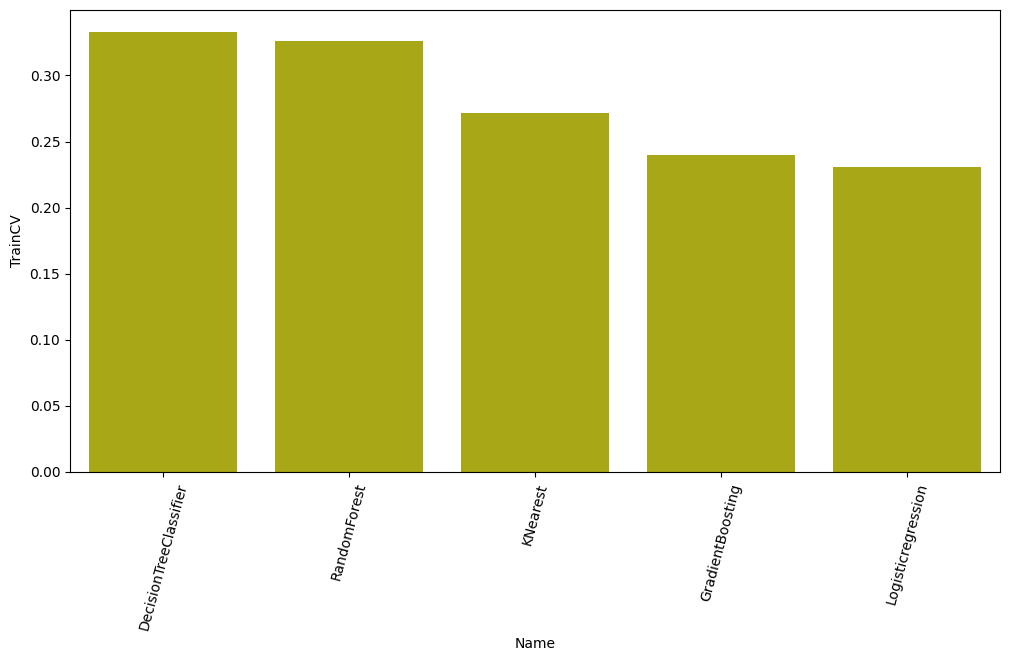

In [144]:
plt.figure(figsize=(12,6))
sns.barplot(data= df_eval, x= 'Name', y='TrainCV',color='y')
plt.xticks(rotation=75)

To select the model we can consider either train CV score or Testing results ( and here we considered Train_cv results nd not testing score so we got highest testing score for Decision Tree clssifier)

## Hyper parameter Tunning

In [90]:
params={'criterion': ['gini', 'entropy'],
        'max_depth': [2,3,4,5,6,7,8,9],
        'min_samples_split': [2,4,5,6,7,8,9,10], 
        }

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [92]:

dtc= DecisionTreeClassifier()
rscv= RandomizedSearchCV(dtc,param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_split': [2, 4, 5, 6, 7, 8,
                                                              9, 10]},
                   scoring='f1_macro')

In [93]:
rscv.best_params_

{'min_samples_split': 4, 'max_depth': 9, 'criterion': 'gini'}

In [94]:
bst_dtc=rscv.best_estimator_
bst_dtc

DecisionTreeClassifier(max_depth=9, min_samples_split=4)

In [95]:
bst_dtc.score(xtrain,ytrain)

0.722440036900369

In [96]:
bst_dtc.score(xtest,ytest)

0.6831180811808119

### Y prediction by using best estimators

In [97]:
ypred_tr= bst_dtc.predict(xtrain)
ypred_ts= bst_dtc.predict(xtest)

In [120]:
ypred_tr[0:100]

array([4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4,
       5, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [99]:
ypred_ts[0:100]

array([3, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 4, 5, 5, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4,
       4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 5, 4], dtype=int64)

In [109]:
ytest.value_counts()

Rating_Round
4               1442
5                555
3                140
2                 29
1                  2
Name: count, dtype: int64

### Confusion Matrics

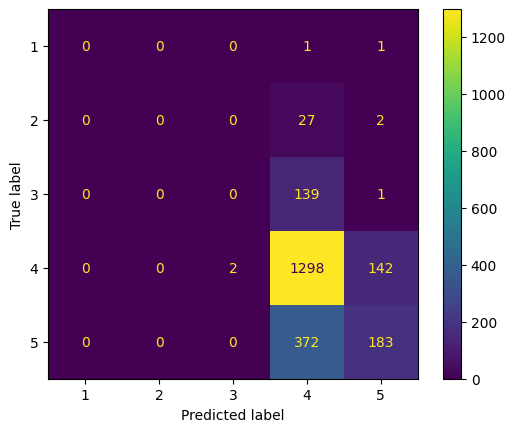

In [101]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf= confusion_matrix(ytest,ypred_ts)
cfd= ConfusionMatrixDisplay(cf, display_labels= bst_dtc.classes_)
cfd.plot()

### Classification Report

In [102]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        29
           3       0.00      0.00      0.00       140
           4       0.71      0.90      0.79      1442
           5       0.56      0.33      0.41       555

    accuracy                           0.68      2168
   macro avg       0.25      0.25      0.24      2168
weighted avg       0.61      0.68      0.63      2168



### Visualize that how tree is built

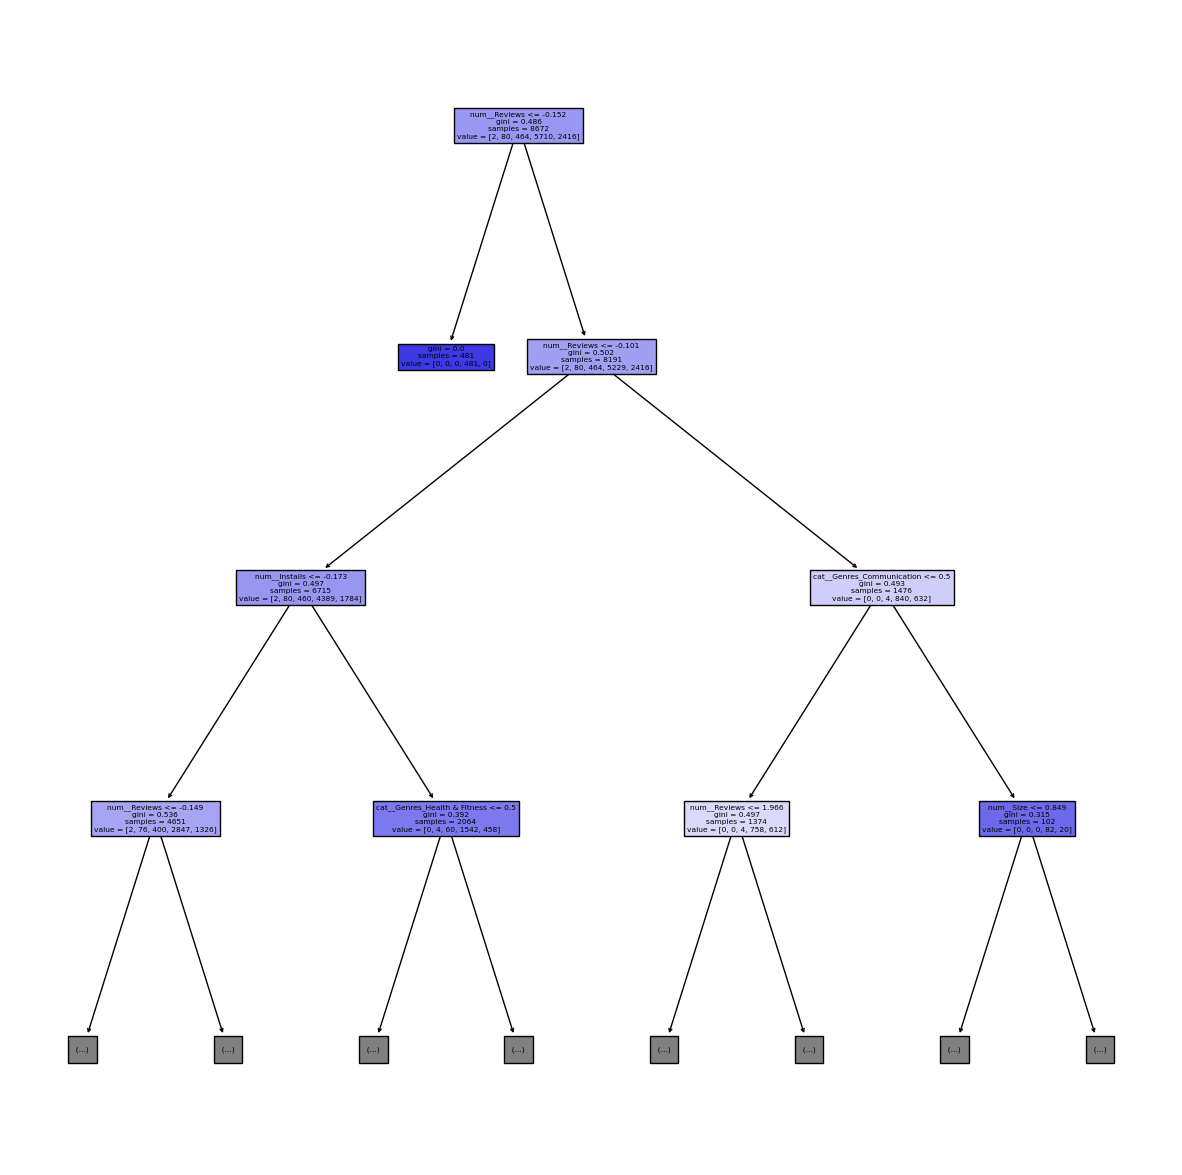

In [117]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(bst_dtc,filled=True,max_depth=3, feature_names=list(xtrain.columns),)
plt.show()


### Prediction for new Data

Here we dont have seperate test file so we are taking samples from given data only.

In [121]:
xnew= x.sample(100)
xnew.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Updated_Month,Updated_Year
5700,FAMILY,6,23.0,1000,Free,0.0,Everyone,Entertainment,1,2018
838,EDUCATION,42828,13.0,1000000,Free,0.0,Everyone,Education,7,2018
9315,PRODUCTIVITY,8,7.5,100,Free,0.0,Everyone,Productivity,7,2018
1250,FOOD_AND_DRINK,333208,34.0,10000000,Free,0.0,Everyone,Food & Drink,8,2018
1169,FINANCE,510401,79.0,10000000,Free,0.0,Everyone,Finance,8,2018


In [124]:
xpre_new= pipe.transform(xnew).toarray()
xpre_new

array([[-0.15170891,  0.13457257, -0.1818672 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.13708204, -0.34202792, -0.17011778, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15170823, -0.60415818, -0.18187779, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.151671  , -0.34202792, -0.18182016, ...,  0.        ,
         0.        ,  0.        ],
       [-0.1517096 , -0.77573436, -0.18187779, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15170994, -0.57079615, -0.18187779, ...,  0.        ,
         0.        ,  0.        ]])

In [125]:
xnew_df= pd.DataFrame(xpre_new,columns= cols)
xnew_df

,num__Reviews,num__Size,num__Installs,num__Price,num__Updated_Year,cat__Category_ART_AND_DESIGN,cat__Category_AUTO_AND_VEHICLES,cat__Category_BEAUTY,cat__Category_BOOKS_AND_REFERENCE,cat__Category_BUSINESS,...,cat__Updated_Month_3,cat__Updated_Month_4,cat__Updated_Month_5,cat__Updated_Month_6,cat__Updated_Month_7,cat__Updated_Month_8,cat__Updated_Month_9,cat__Updated_Month_10,cat__Updated_Month_11,cat__Updated_Month_12
0,-0.151709,0.134573,-0.181867,-0.064416,0.545278,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.137082,-0.342028,-0.170118,-0.064416,0.545278,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.151708,-0.604158,-0.181878,-0.064416,0.545278,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.037896,0.658833,-0.064267,-0.064416,0.545278,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.022629,2.803535,-0.064267,-0.064416,0.545278,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.151711,-0.342028,-0.181879,-0.064416,0.545278,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,-0.151702,-0.103728,-0.181820,-0.064416,0.545278,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,-0.151671,-0.342028,-0.181820,-0.064416,0.545278,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
98,-0.151710,-0.775734,-0.181878,-0.064416,0.545278,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [126]:
ynew= bst_dtc.predict(xnew_df)
ynew

array([4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 5,
       4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 4, 4,
       4, 5, 5, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4,
       5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [127]:
Preds= xnew

In [129]:
Preds

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Updated_Month,Updated_Year
5700,FAMILY,6,23.0,1000,Free,0.0,Everyone,Entertainment,1,2018
838,EDUCATION,42828,13.0,1000000,Free,0.0,Everyone,Education,7,2018
9315,PRODUCTIVITY,8,7.5,100,Free,0.0,Everyone,Productivity,7,2018
1250,FOOD_AND_DRINK,333208,34.0,10000000,Free,0.0,Everyone,Food & Drink,8,2018
1169,FINANCE,510401,79.0,10000000,Free,0.0,Everyone,Finance,8,2018
...,...,...,...,...,...,...,...,...,...,...
8578,PRODUCTIVITY,0,13.0,5,Free,0.0,Everyone,Productivity,1,2018
10219,BUSINESS,27,18.0,5000,Free,0.0,Everyone,Business,5,2018
10827,FAMILY,117,13.0,5000,Free,0.0,Everyone,Education,6,2018
10811,AUTO_AND_VEHICLES,4,3.9,100,Free,0.0,Everyone,Auto & Vehicles,7,2018


In [130]:
Preds['Rating_pred']= ynew

In [132]:
Preds

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Updated_Month,Updated_Year,Rating_pred
5700,FAMILY,6,23.0,1000,Free,0.0,Everyone,Entertainment,1,2018,4
838,EDUCATION,42828,13.0,1000000,Free,0.0,Everyone,Education,7,2018,4
9315,PRODUCTIVITY,8,7.5,100,Free,0.0,Everyone,Productivity,7,2018,4
1250,FOOD_AND_DRINK,333208,34.0,10000000,Free,0.0,Everyone,Food & Drink,8,2018,5
1169,FINANCE,510401,79.0,10000000,Free,0.0,Everyone,Finance,8,2018,5
...,...,...,...,...,...,...,...,...,...,...,...
8578,PRODUCTIVITY,0,13.0,5,Free,0.0,Everyone,Productivity,1,2018,4
10219,BUSINESS,27,18.0,5000,Free,0.0,Everyone,Business,5,2018,4
10827,FAMILY,117,13.0,5000,Free,0.0,Everyone,Education,6,2018,4
10811,AUTO_AND_VEHICLES,4,3.9,100,Free,0.0,Everyone,Auto & Vehicles,7,2018,4


In [133]:
Preds.to_csv('Rating_Predictions',index= False)
# Index= False is to remove row names in CSV